<a href="https://colab.research.google.com/github/JuanCReyes1/Neurocomputing/blob/master/IzhikevichNeuronPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling the Neural Response of a Population of Spiking Neurons Using the Izhikevich Neuron
# February $26^{th}$, 2020
## Dalhousie University, Halifax, Nova Scotia
### Juan C. Reyes, Elias B. Habib, Shaikh D. Salam
### Neurocomputing and Theoretical Neuroscience

# Neural Response of a Population of Izhikevich Neurons

The typical spiking neuron is characterized by three functionally distinct parts known as the axon, dendrites, and soma. The dendrite of a spiking neuron functions to collect signals from neighbouring neurons which are relayed to the soma. The soma of a neuron contains the nucleus and is often described as the central processing unit (Ludwig & Varacallo, 2018). Vázquez (2010) describes the soma as performing a significant non-linear processing: The input from the neighbouring neuron must exceed a threshold in order to propagate an output signal. The axon of the neuron will deliver the output signal to other neurons (Vázquez, 2010). 


Neural networks are characterized by ongoing structural changes which are adaptations to the environment (Slomowitz et al., 2015). A physical and functional change to a neural network is defined by the phenomeon of synaptic plasticity (Trappenberg, 2010). The concept of synaptic plasticity has been well-understood by modeling single neurons in a simulated network. By modeling a neuron, researchers have the ability to understand firing behaviour amongst a larger population of neurons. The collective behaviour of neurons in a network is referred to as a population model (Trappenberg, 2010). The organization of neurons is typically arranged in populations of cells, which have similar firing behaviour (Gerstner et al., 2014). In most recent studies of a population model, the Izhikevich spiking neuron model has been implemented to understand the characteristics of different neurons (Gunasekaran et al., 2019). The Izhikevich spiking neuron model is able to effectively describe the response properties of real neurons (Trappenberg, 2010). 

Prior to the development of the Izhikevich spiking neuron model, the Hodgkin-Huxley model was developed to mathematically describe the propagation of an action potential (Gunasekaran et al., 2019). The Hodgkin-Huxley model was the first mathematical model to predict electrical excitability within neurons (Schwiening, 2012). Hodgkin and Huxley (1952) revolutionized the field of computational neuroscience but the model faces drawbacks. For instance, the Hodgkin-Huxley model appears to be a more simplistic representation of the biological mechanisms of neurons. Moreover, the Hodgkin-Huxley equations fails to account for the variability of the speed of the rising phase of an action potential (Santamaria & Bower, 2009). 

Unlike most spiking neuron models, Izhikevich (2003) proposed a model which reproduces spiking and bursting behaviour of various cortical neurons. Izhikevich (2003) integrated the biological plausibility of the Hodgkin-Huxley model and the computational analysis of the integrate-and-fire model. Izhikevich (2003) proposed a two-dimensional differential equations model, such that one outlines the membrane potential v and the other for a recovery variable u,

## $\dot v = \frac{dv}{dt} = 0.04 v^{2}(t) = 5v(t) + 140 - u(t) +I(t)$

## $\dot u = \frac{du}{dt} = a(bv(t)-u(t))$

with the existence of reset conditions (Trappenberg,2010):

## $v(v>30) = c$ and $u(v \geq 30) = u-d $

The activation of $K^{+}$ ionic currents and the inactivation of $Na^{+}$ ionic currents are mediated by the membrane potential and recovery variable of a neuron, respectively (Izhikevich, 2003). As the membrane potential approaches +30mV, the recovery variable of the neuron rests, thus the event of repolarization occurs (OpenStax College, 2013). Finally, the synaptic current (mA) of the spiking neuron is modeled by the variable I. Similar to real neurons, the Izhikevich spiking neuron model is not represented by a fixed threshold, suggesting that the resting potential can be between -70mV and -60mV (Izhikevich, 2003). The Izhikevich neuron is represented by four dimensionless parameters which include a, b, c, and d. 

Parameter $a$ represents the duration for the initiation of the recovery variable u. Parameter b is defined as the sensitivity of the recovery variable during fluctuations in the membrane potential of a neuron. Moreover, parameter c and d are  associated with the after-spike reset value of the membrane potential with respect to a fast high-threshold K+ conductance and a slow high-threshold $K^{+}$ and $Na^{+}$ , respectively. However, by altering the four parameters of the Izhikevich model, a wide range of firing patterns and behaviours will result. These firing patterns are a representation of the population of neurons found in the neocortex and the thalamus (Izhikevich, 2003; Trappenberg, 2010). 


Global Parameters:


In [0]:
import numpy as np
import matplotlib.pyplot as plt
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 20000
input_amp=5    # AMPLITUDE OF INPUT
A = 0.5
f = 0.0008
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'
#noise = 'no'

Generate Input Data:
Parameters: 
input_onset_on : the time the current is activated

input_onset_off : the time the current is de-activated

input_amp: the amplitude of the current

figure: The type of current generated {"step":step function,"sin":sinusoidal}

noise: Select wether the input current has Gaussian noise {'yes','no'}

A: Amplitude of the sinusoidal current 

f: Frequency of the sinusoidal current

In [0]:
def Input(input_onset_on,input_onset_off,input_amp,figure,noise,A,f):
    
    I=np.zeros((len(time)))     # CURRENT (INPUT)
    #f = 5 #frequency of oscillation (Hertz)k
    #A = 20 #amplitude of oscillation
    if(figure == "step" and noise == "no"):
      for k in range (0,len(time)):
          
          if(input_onset_on < time[k] < input_onset_off):
              I[k]=input_amp
  
      return I

    elif(figure == "step" and noise == "yes"):
      for k in range (0,len(time)):
          
          if(input_onset_on < time[k] < input_onset_off):
              random = 1*np.random.normal(0)
              I[k]=input_amp + random
          else:
              random = 1*np.random.normal(0)
              I[k] = random
  
      return I

    if(figure == "sin" and noise == "no"):
      for k in range (0,len(time)):
         
          if(input_onset_on < time[k] < input_onset_off):              
              I[k]=input_amp + A*input_amp*np.sin(2*np.pi*f*time[k])
              
      return I

    elif(figure == "sin" and noise == "yes"):
      for k in range (0,len(time)):
         
          if(input_onset_on < time[k] < input_onset_off): 
              random = 1*np.random.normal(0)              
              I[k]=input_amp + A*input_amp*np.sin(2*np.pi*f*time[k]) + random
          else:
              random = 1*np.random.normal(0)
              I[k] = random
              
      return I

# Plot the step function:

In [0]:
def plot_current():
 
  fig, ax1 = plt.subplots(figsize=(15,5))

  ax1.plot(time, Input(input_onset_on,input_onset_off,input_amp,figure=figure,noise=noise,A=A, f=f), 'b-') # y label

  ax1.set_xlabel('time (s)',color='b') # x label
  # Make the y-axis label, ticks and tick labels match the line color.
  ax1.set_ylabel('Input mV', color='b')
  ax1.set_ylim(0,input_amp*2) # setting the plotting range
  plt.title('Figure 2: Input to the system')
  plt.show()   

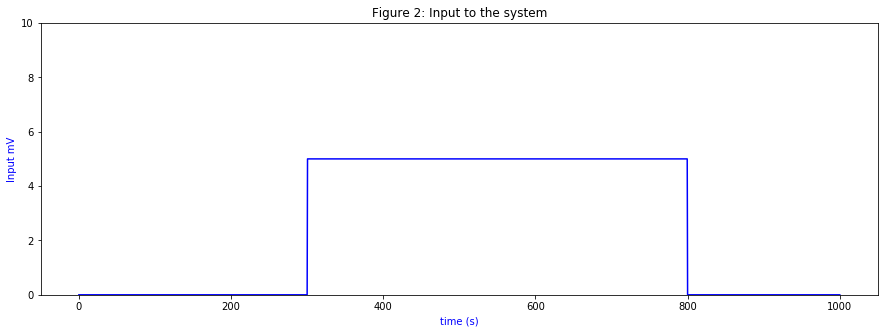

In [0]:
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5   # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
#noise = 'yes'
noise = 'no'
plot_current()

In [0]:
# Numerical Solution to the Izhikevich model
def Diff_Eqns(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) # Discrete form of membrane potential of the neuron 
    u = u + h *(a*(b*v-u))            # Discrete form of membrane recovery variable
    return u,v  

def Izhikevich(a,b,c,d,result):
    v=-65*np.ones((len(time)))  # SETS UP THE INITIAL VALUES of the membrane potential
    u=0*np.ones((len(time)))    # SETS UP THE INITIAL VALUES of the membrane recovery
    u[0]=b*v[0]                 # INITIAL CONDITION 
    peaks = []                  # Initialize Peaks array to store location of where peaks are

    
    ##Generate our current##
    I=Input(input_onset_on,input_onset_off,input_amp,figure,noise,A,f)

    # EULER METHOD INTEGRATION
    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Diff_Eqns(a,b,u[k],v[k],I[k]) # Numerically solving the equations at each time point
        ##The Reset   
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d

    #peak finder        
    peaks_locations = find_peaks(v,-20)
    peaks.append(peaks_locations[0])

  
    if(result=="graph"):
       plot_input_output(time,v,I,a,b,c,d,peaks_locations)  
    elif(result=="data"):
      return (u,v,peaks_locations)

def plot_input_output(time,v,I,a,b,c,d,peaks):   
    # PLOTTING

    
    #AX1
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(time, v, 'b-', label = 'Output')
    
    #for peak,maxval in zip(peaks_locations[0],peaks_locations[1]["peak_heights"]):
    for peak,maxval in zip(peaks[0],peaks[1]["peak_heights"]):
        ax1.plot(h*peak,maxval, 'ro')

    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    
    #AX2
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*5)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()

# We now study different types of neuronal firing.

Output of the model is v(mV) in blue and our input current , (mA) in red as a function of time in milliseconds (ms). 

Model parameters:

a = time scale of recovery variable

b = sensitivity of the recovery variable to fluctuations of the membrane potential

c = voltage reset parameter

d = reset of the recovery variable


# Excitatory Cortical Cells:

a = 0.02, b = 0.2 , c = -65, d = 8


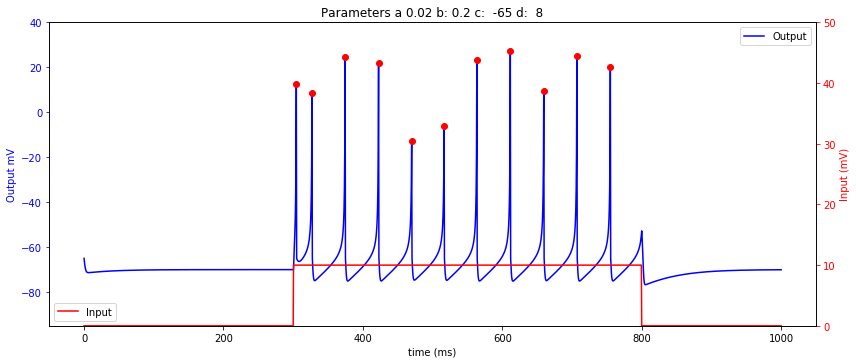

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=10 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 8

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## Intrinsically Bursting


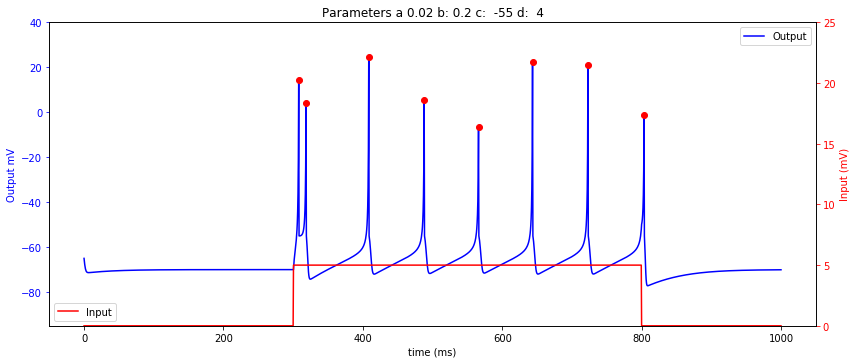

In [0]:
#@title a = 0.02, b = 0.2 , c = -55, d = 4
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -55
d = 4

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Chattering


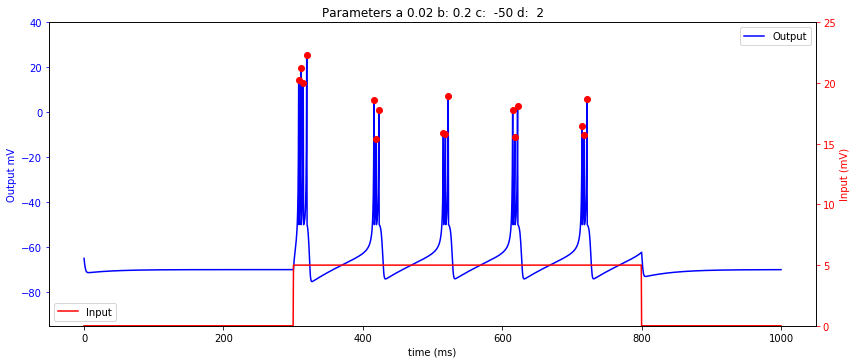

In [0]:
#@title a = 0.02, b = 0.2 , c = -50, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300            # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Inhibitory Cortical Cells:
## Fast Spiking


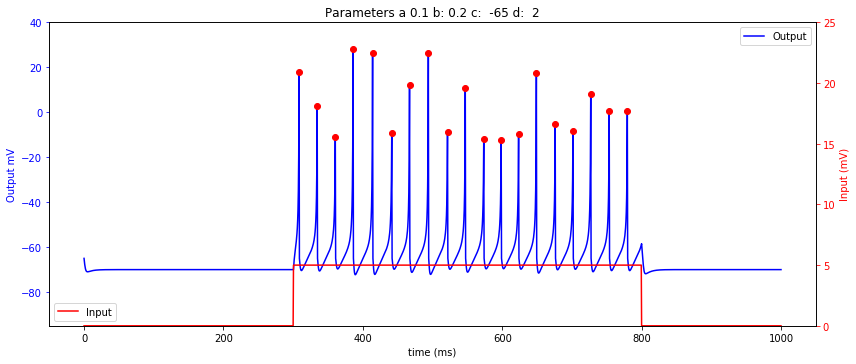

In [0]:
#@title a = 0.1, b = 0.2 , c = -65, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.1
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## Low-threshold Spiking



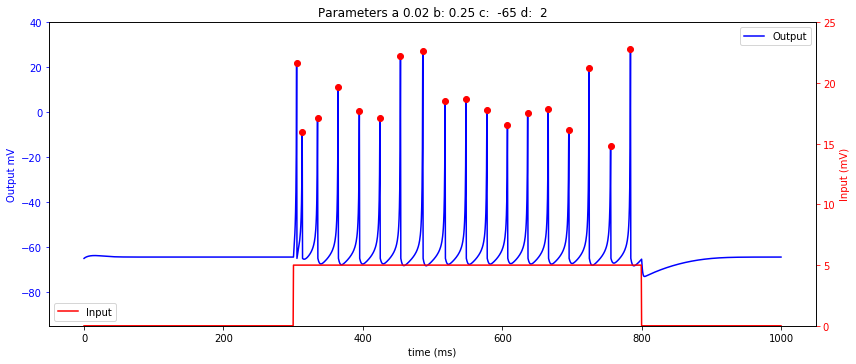

In [0]:
#@title a = 0.02, b = 0.25 , c = -65, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.25
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Sinusoidal Input Current

## $ A = 0.5$, $ f = 0.01 $ , $t \epsilon [0:4000]$

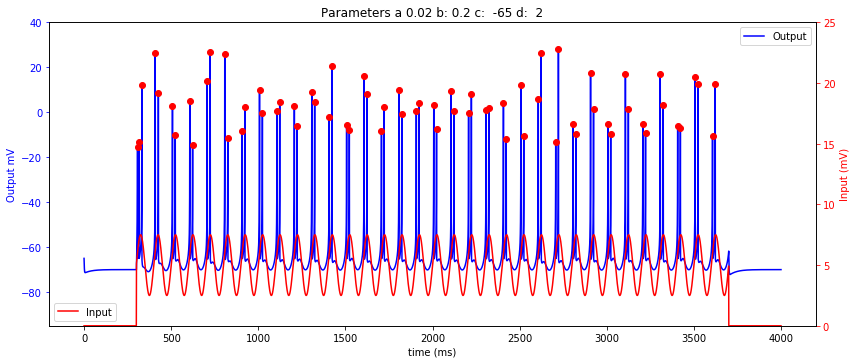

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 3700
input_amp=5 # AMPLITUDE OF INPUT
A=0.5 #sine function amplitude
f = 0.01
time=np.arange(0,4000.1,h)  # time period 1000ms (1s)
figure = 'sin'
#figure = 'step'
noise = "no"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## $ A = 0.5$ ,  $ f = 0.0008 $ , $t \epsilon [0:4000]$

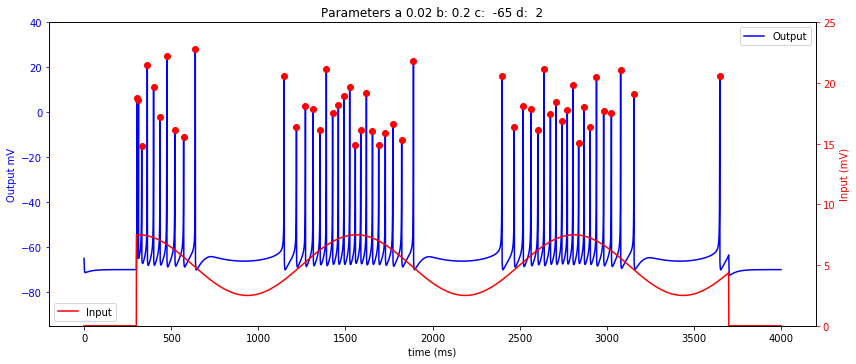

In [0]:
#@title  Lowering the frequency
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 3700
input_amp=5 # AMPLITUDE OF INPUT
A=0.5 #sine function amplitude
#f = 0.01
f=0.0008
time=np.arange(0,4000.1,h)  # time period 1000ms (1s)
figure = 'sin'
#figure = 'step'
noise = "no"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## $ A = 0.5$ ,  $ f = 0.0003 $ , $t \epsilon [0:4000]$

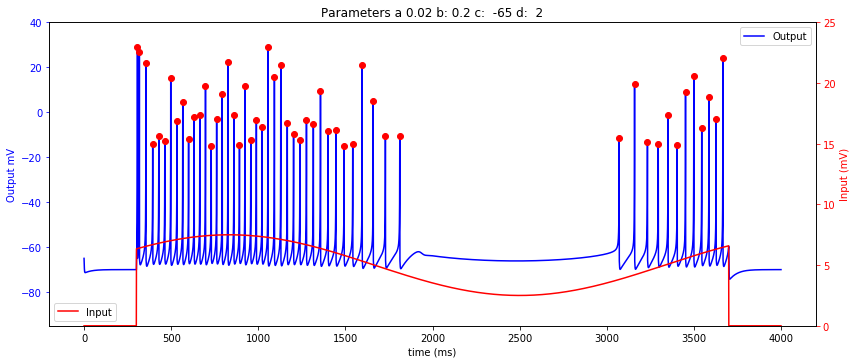

In [0]:
#@title  Lowering the frequency again
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 3700
input_amp=5 # AMPLITUDE OF INPUT
A=0.5 #sine function amplitude
#f = 0.01
f=0.0003
time=np.arange(0,4000.1,h)  # time period 1000ms (1s)
figure = 'sin'
#figure = 'step'
noise = "no"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Noisy Izhikevich Neurons

## Noisy step function input:

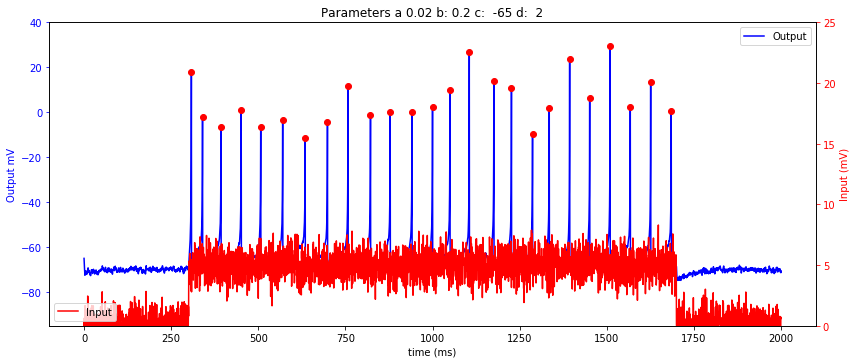

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 1700
input_amp=5 # AMPLITUDE OF INPUT
A=1 #sine function amplitude
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = "yes"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


#Sinusoidal Noise:
## Input Current:

## $I = I_{ext} +  I_{ext} A sin(2\pi f t) + \eta $

## Where $\eta$ is a random Gaussian integer centered at $0$.

## $ A = 1$ ,  $ f = 0.01 $ , $t \epsilon [0:4000]$

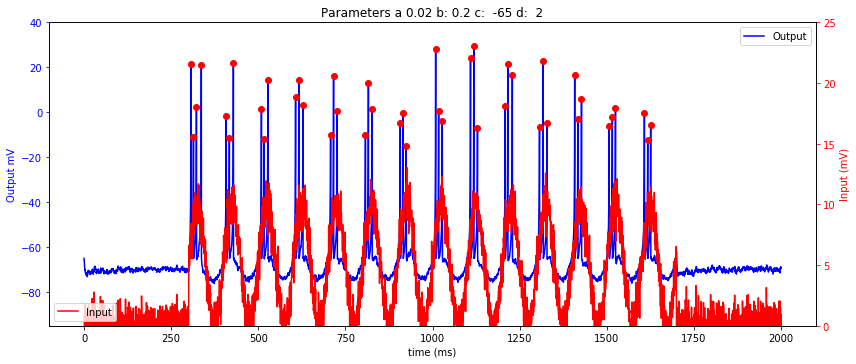

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 1700
input_amp=5 # AMPLITUDE OF INPUT
A=1 #sine function amplitude
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
figure = 'sin'
#figure = 'step'
noise = "yes"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


### Adding noise:

## $ A = 0.5$ ,  $ f = 0.0008 $ , $t \epsilon [0:4000]$

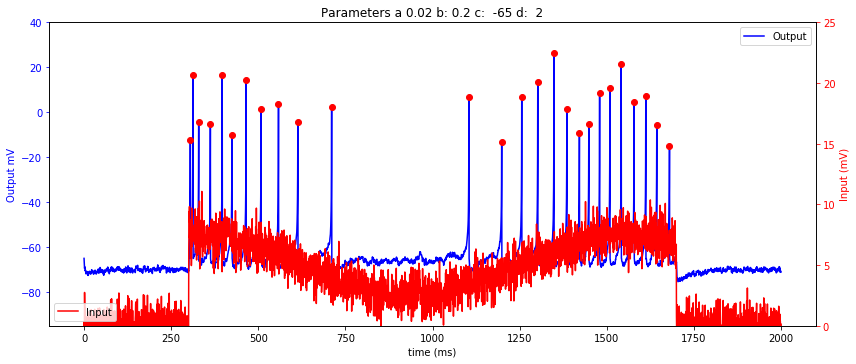

In [0]:
#@title  
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 1700
input_amp=5 # AMPLITUDE OF INPUT
A=0.5 #sine function amplitude
f = 0.0008
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
figure = 'sin'
#figure = 'step'
noise = "yes"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# We now present a study of the population of N Izhikevich Neurons

## Data Generation

We present a function which creates a population of N Izhikevich Neurons, with or without noise.

Recall the output of the Izhikevic function is $(u,v,peaks)$.

We will create and store a population of N = 1000 chattering Izhikevich Neurons with and without noise.

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

Looks like this:

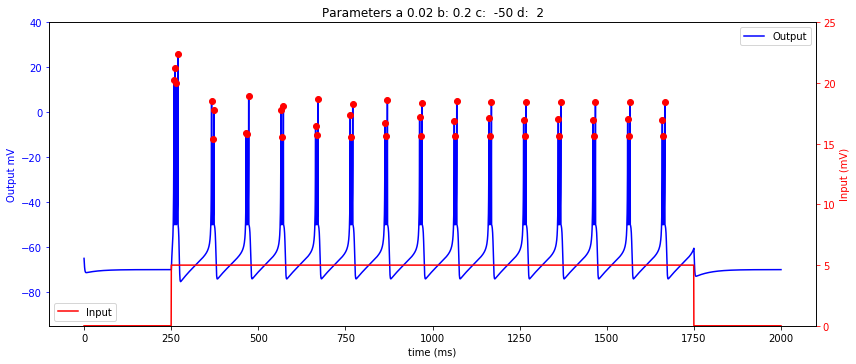

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


In [0]:
####Create a population of N Izhikevich Neurons
####Output: {"dictionary", "array"}
def create_population(N,output):

  if(output=="dictionary" and N==1):
    neuron_population = {}
    neuron_population["neuron{0}".format(N)] = Izhikevich(a=a,b=b,c=c,d=d,result="data")

    return neuron_population

  elif(output =="dictionary" and N>1):
    neuron_population = {}
    for neuron in range(1,N+1):
      neuron_population["neuron{0}".format(neuron)] = Izhikevich(a=a,b=b,c=c,d=d,result="data")

    return neuron_population

  elif(output == "array" and N==1):
    neuron_population = {}
    neuron_population["neuron{0}".format(N)] = Izhikevich(a=a,b=b,c=c,d=d,result="data")

    population_u = []
    population_v = [] 
    population_peaks = []

    for i in neuron_population:
      population_u.append(neuron_population[i][0])
      population_v.append(neuron_population[i][1])
      population_peaks.append(neuron_population[i][2])

    population_u = np.array(population_u)
    population_v = np.array(population_v)
    population_peaks = np.array(population_peaks)

    return (population_u,population_v,population_peaks)
  elif(output == "array" and N>1):

    neuron_population = {}

    for neuron in range(1,N+1):
      neuron_population["neuron{0}".format(neuron)] = Izhikevich(a=a,b=b,c=c,d=d,result="data")

    population_u = []
    population_v = [] 
    population_peaks = [] 

    for i in neuron_population:
      population_u.append(neuron_population[i][0])
      population_v.append(neuron_population[i][1])
      population_peaks.append(neuron_population[i][2][0:2])

    population_u = np.array(population_u)
    population_v = np.array(population_v)
    population_peaks = np.array(population_peaks)

  return population_u,population_v,population_peaks

 

## Chattering Izhikevich Neuron: 
## a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

## Python Dictionary:

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

neuron_population_dictionary = create_population(1000,'dictionary')
print(len(neuron_population_dictionary))

1000


## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

### Two arrays

$I_{ext} = 5$ :(U,V,P) 

$I_{ext} = 10$ :(U1,V1,P1) 


## Numpy Array:

In [0]:
import numpy as np
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

U,V,P = create_population(1000,"array")

input_amp=10 # AMPLITUDE OF INPUT
U1,V1,P1 = create_population(1000,"array")

Confirm we have $N=1000$ for U and V.

Also, compare the values of every neuron in U and V to an individual Izhikevich Neuron and confirm that they are all equivalent in the case without noise.

In [0]:
print(U.shape)
print(V.shape)
print(P.shape)
print((v == V))
print(u==U)

(1000, 4001)
(1000, 4001)
(1000, 2)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


The last two operations confirm that we have created an array of $N=1000$ identical Izhikevich Neurons.

### Out of curiosity, we time our algorithm to see which is faster at generating N=10,000 Izhikevic Neurons.

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

###Dictionary
given

$I_{ext} = 5$ :(U,V,P) 

big_neuron_population_dictionary : Python Dictionary

### Two arrays
given

$ I_{ext} = 5 : (Ubig,Vbig,Pbig) $

$ I_{ext} = 10 :(Ubig1,Ubig1,Pbig1) $

In [0]:
import time as tme

#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2


start_time = tme.time()
big_neuron_population_dictionary = create_population(10000,"dictionary")
print("--- %s seconds ---" % round(tme.time() - start_time, 2)) 

start_time = tme.time()
Ubig,Vbig,Pbig = create_population(10000,"array")
print("--- %s seconds ---" % round(tme.time() - start_time, 2)) 


input_amp=10 # AMPLITUDE OF INPUT
start_time = tme.time()
Ubig1,Vbig1,Pbig1 = create_population(10000,"array")
print("--- %s seconds ---" % round(tme.time() - start_time, 2)) 

--- 156.24 seconds ---
--- 153.87 seconds ---
--- 155.72 seconds ---


The time is close to equal for both.

In [0]:
print(Ubig.shape)
print(Vbig.shape)
print(Pbig.shape)
print(u==Ubig)
print((v == Vbig))


(10000, 4001)
(10000, 4001)
(10000, 2)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


Similarly, all N=10,000 neurons generated here are identical.

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function with noise.

## Data 
given $I_{ext} = 5 :(un,vn,peaksn) $

and 

$I_{ext} = 10 :(u1n,vn1,peaksn1) $

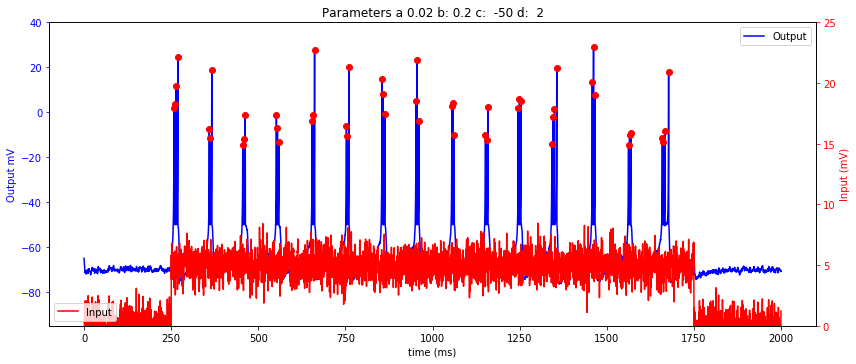

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
un,vn,peaksn = Izhikevich(a=a,b=b,c=c,d=d,result="data") 

input_amp=10 # AMPLITUDE OF INPUT
un1,vn1,peaksn1 = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# N = 1000 Chattering Izhikevich Neurons with noise

### Python Dictionary
given

$I_{ext} = 5$ : (U,V,P) 
neuron_population_dictionary_noisy : Python Dictionary

In [0]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

neuron_population_dictionary_noisy = create_population(1000,'dictionary')
print(len(neuron_population_dictionary_noisy))

1000


### Two Python arrays

given

$ I_{ext} = 5 : Un,Vn,Pn $

$ I_{ext} = 10 :(Un1,Vn1,Pn1) $

In [0]:
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

Un,Vn,Pn = create_population(1000,"array")

input_amp = 10

Un1,Vn1,Pn1 = create_population(1000,"array")

In [0]:
print(Un.shape)
print(Vn.shape)
print(Pn.shape)
print(un==Un)
print((vn == Vn))



(1000, 4001)
(1000, 4001)
(1000, 2)
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


Here we are able to confirm that we have indeed generated $N=1000 $ noisy Izhikevic neurons. Due to the nature of random number generation we can also observe that all our arrays are not equivalent to the first neurons generated.


# N=10,000 Izhikevich Neurons
## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function with noise.

###Dictionary
given

$I_{ext} = 5$ :(U,V,P) 

big_noisy_dictionary : Python Dictionary

### Two arrays
given

$ I_{ext} = 5 : (Ubign,Vbign,Pbign) $

$ I_{ext} = 10 :(Ubign1,Vbign1,Pbign1) $

In [0]:
import time as tme

#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2


start_time = tme.time()
big_noisy_dictionary = create_population(10000,"dictionary")
print("--- %s seconds ---" % round(tme.time() - start_time, 2)) 

start_time = tme.time()
Ubign,Vbign,Pbign = create_population(10000,"array")
print("--- %s seconds ---" % round(tme.time() - start_time, 2)) 

input_amp = 10
start_time = tme.time()
Ubign1,Vbign1,Pbign1 = create_population(10000,"array")
print("--- %s seconds ---" % round(tme.time() - start_time, 2))

--- 309.66 seconds ---
--- 307.3 seconds ---
--- 310.9 seconds ---


Now generating our data in a dictionary was slightly faster.

As we can clearly see, we have generated $N=10,000$ neurons which are all distinct from one another.

In [0]:
print(Ubign.shape)
print(Vbign.shape)
print(Pbign.shape)
print(un==Ubign)
print((vn == Vbign))


(10000, 4001)
(10000, 4001)
(10000, 2)
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


# Sinusoidal Current:

## We now generate populations of Izhikevich Neurons with and without Gaussian noise exposed to a varying external current $I_{ext} = 5$ and $I_{ext} = 10$ we obtain 4 Python arrays. 

In [0]:
#### Model Input
h=0.5 #step size
input_onset_on=250             # Onset of input
input_onset_off = 1750
input_amp=5 # AMPLITUDE OF INPUT
A=0.2
f = 0.01
time=np.arange(0,2000.1,h)  # time period 1000ms (1s)

##Input current shape
figure = 'sin'

##System Parameters##
a = 0.02 ;b = 0.2 ; c = -50;d = 2

##Generate data, clean this up later
noise = 'no'
input_amp=5 # AMPLITUDE OF INPUT
Usin,Vsin,Psin = create_population(1000,"array")
input_amp = 10
U1sin,V1sin,P1sin = create_population(1000,"array")

noise='yes'
input_amp=5 # AMPLITUDE OF INPUT
Unsin,Vnsin,Pnsin = create_population(1000,"array")
input_amp = 10
U1nsin,V1nsin,P1nsin = create_population(1000,"array")



### We will now turn our analysis to studying the response of the population to our changing external currents by taking a look at their behaviour in an f-I curve. 

For now, lets leave this section with a glimpse of another type of analysis we can perform now that we have obtained the dynamic evolution to the Izhikevich differential equations:

## $\dot v = \frac{dv}{dt} = 0.04 v^{2}(t) = 5v(t) + 140 - u(t) +I(t)$

## $\dot u = \frac{du}{dt} = a(bv(t)-u(t))$

with

## $v(v>30) = c$ and $u(v \geq 30) = u-d $

We can actually eliminate fully the time dependance of the dynamics by studying simply the relation of the two dynamic quantities with respect to each other. We look at the 'space of states' or *'phase space'* of a chattering Izhikevich Neuron with and without noise.

# Create function to plot the phase space of a two dimensional Izhikevich Neuron

In [0]:
def phase_space(time,U,V): #I):
  
## Generate Graphs ##
  fig, axs = plt.subplots(2,1,figsize=(15, 8))

  ## Time Series Graph ##

  axs[0].plot(time[0:],U[0][0:],label = 'U')
  axs[0].plot(time[0:],V[0][0:],label = 'V')
  #axs[0].plot(time[0:],I)
  axs[0].set_title("Time Series for V, and u")
  axs[0].set(xlabel="Time (ms)", ylabel="V(mV)")

  ## Phase Space Diagram ## 
  #axs[1] = axs[0].twinx()
  axs[1].plot(U[0][0:],V[0][0:], c='r',markersize=2,label='flow')
  axs[1].set_title("Phase Space Diagram")
  axs[1].set(xlabel="Recovery Variable (u)", ylabel="Potential (V)")
      
  plt.tight_layout()    
  axs[0].legend(loc=1)
  axs[1].legend(loc=3)


# Phase Spaces

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

$I_{ext} = 5 (mA)$

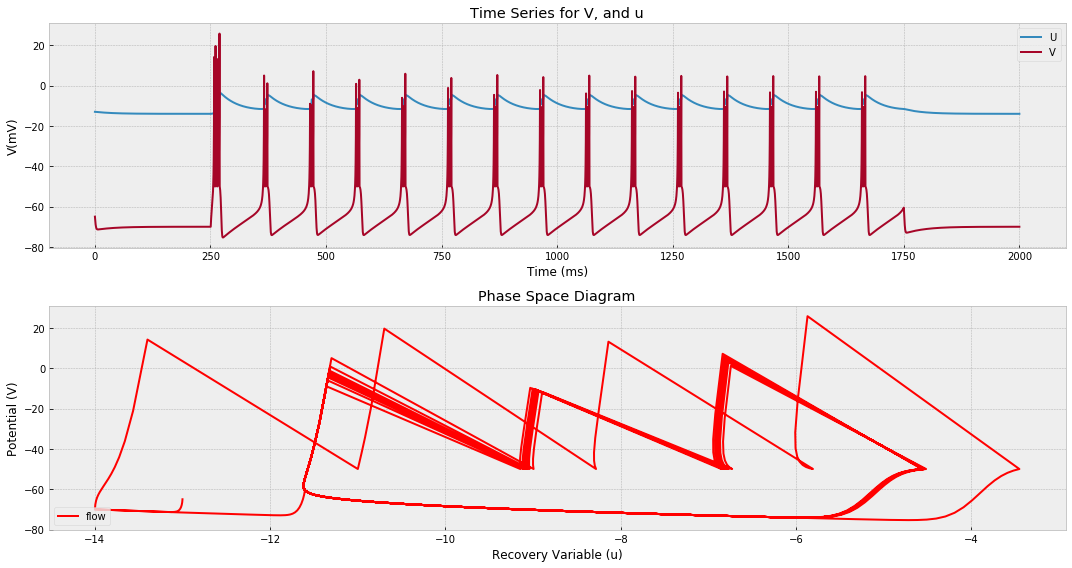

In [84]:
phase_space(time,U,V)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function, no noise.

$I_{ext} = 10 (mA)$

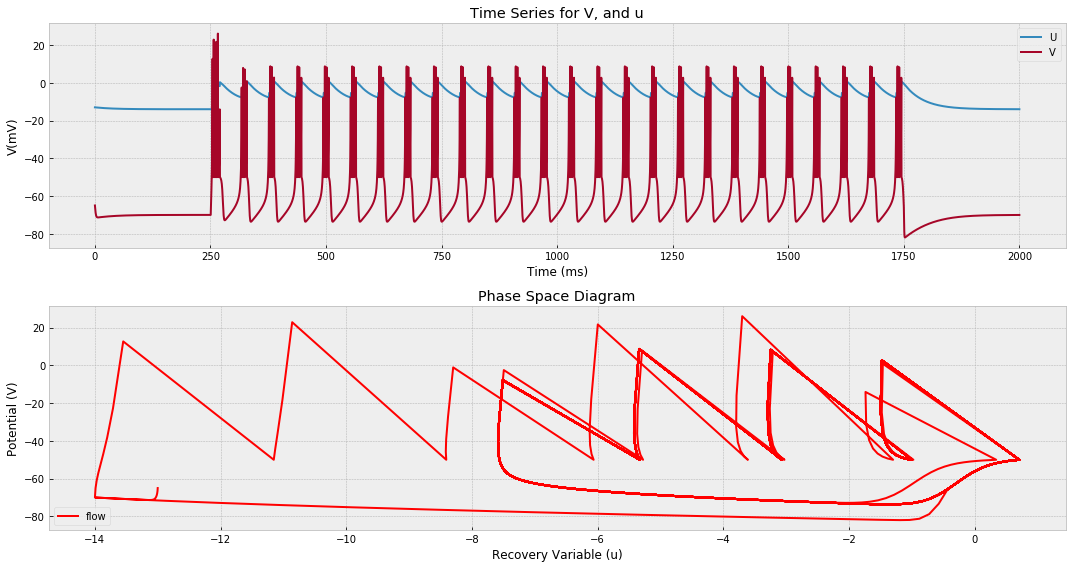

In [85]:
phase_space(time,U1,V1)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function with noise.

$I_{ext} = 5 (mA)$

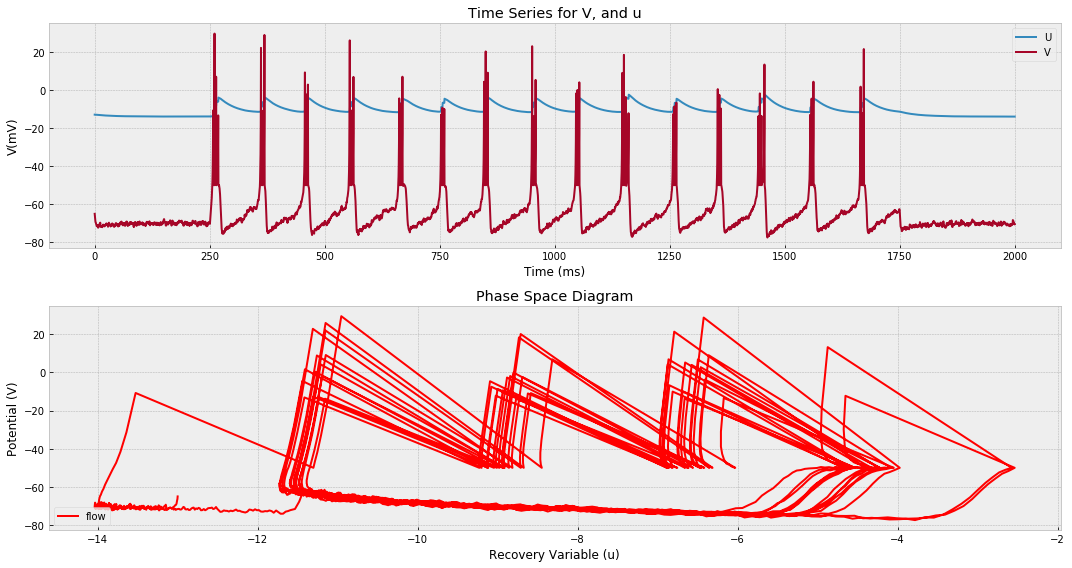

In [86]:
phase_space(time,Un,Vn)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Step function with noise.

$I_{ext} = 10 (mA)$

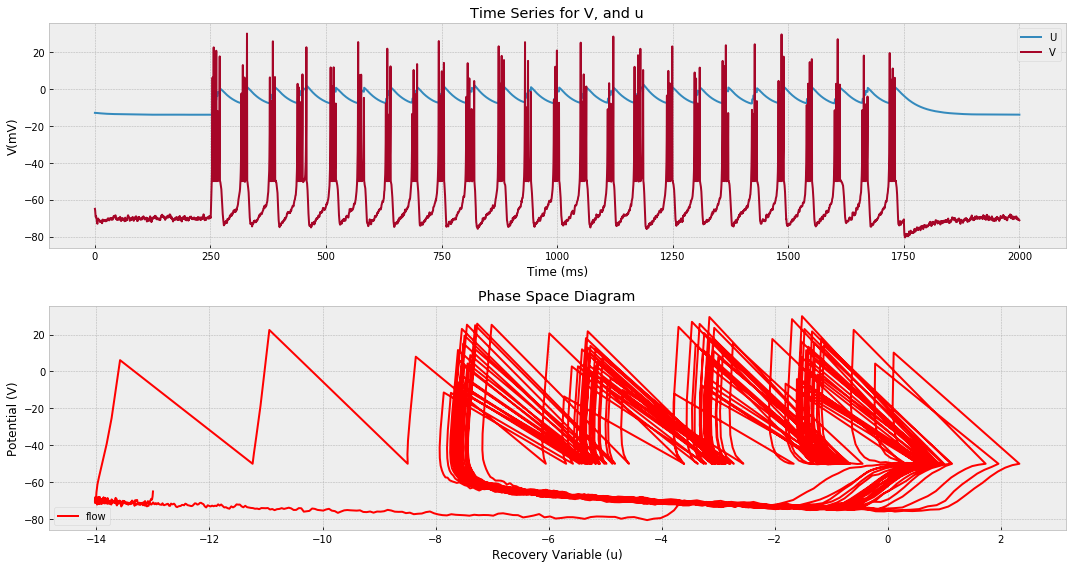

In [87]:
phase_space(time,Un1,Vn1)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Sinusoidal function without noise.

$I_{ext} = 5 (mA)$

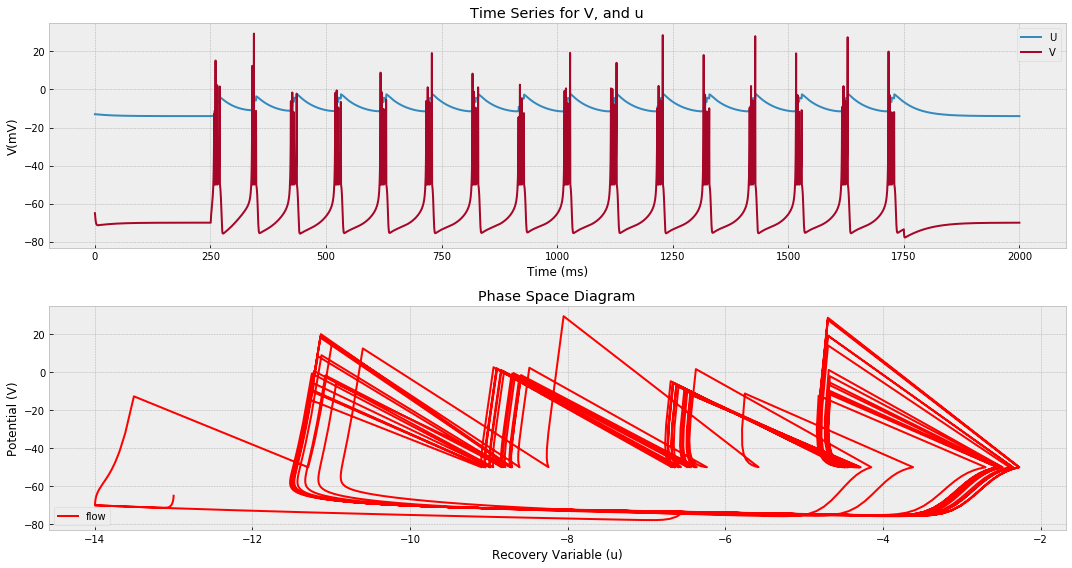

In [88]:
phase_space(time,Usin,Vsin)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Sinusoidal function without noise.

$I_{ext} = 10 (mA)$

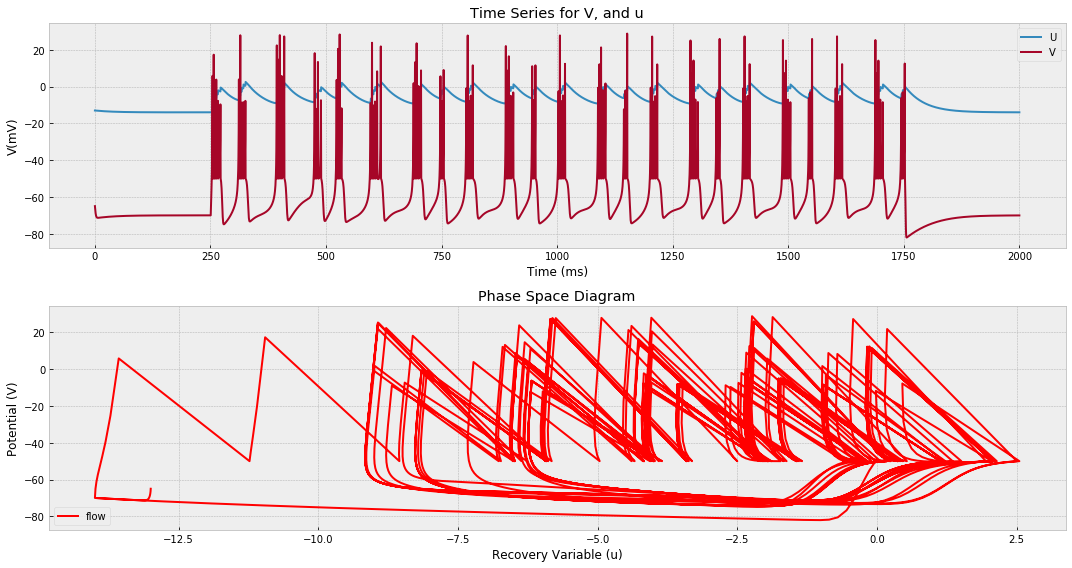

In [89]:
phase_space(time,U1sin,V1sin)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Sinusoidal function with noise.

$I_{ext} = 5 (mA)$

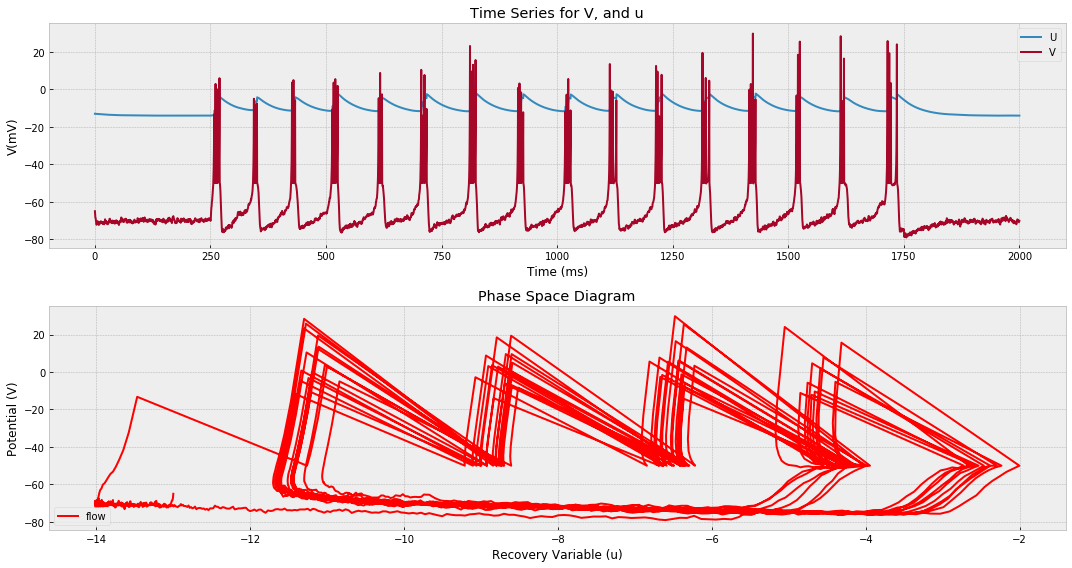

In [90]:
phase_space(time,Unsin,Vnsin)

## Chattering Izhikevich Neuron: a = 0.02, b = 0.2 , c = -50, d = 2
##Sinusoidal function with noise.

$I_{ext} = 10 (mA)$

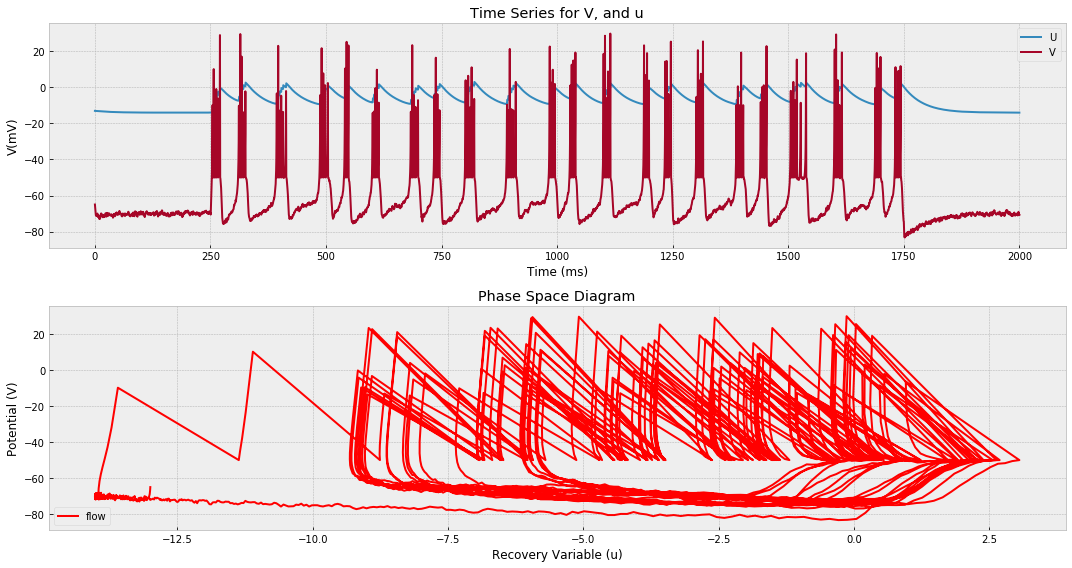

In [91]:
phase_space(time,U1nsin,V1nsin)

The picture of our phase space give us another means of studying the dynamical behaviour of the Izhikevich Neurons. Clearly from our time series graph we can see that our neuron is subjected to a repeated cycle of chattering bursts. However, the behaviour is not perfectly regular and although the system has this characteristic bursting it is still highly unpredictable. The property of a system that displays irregular periodicity is called *Quasiperiodic*. Generally, quasiperiodic behavior is a pattern of recurrence with a component of unpredictability. It is a well known result from dynamics that closed loops or cycles in phase space correspond to periodic or quasi-periodic solutions. We can try to extract more information about our system from phase space.

Time series analysis of quasiperiodic behaviour can be extremely challenging which is why we look towards the phase space diagram to obtain qualitative behaviour of the dynamics. A very common technique from dynamical systems theory is to determine the [Arnold Tongue](https://en.wikipedia.org/wiki/Arnold_tongue) regions of the dynamics. These regions are used to study the organization of mode-locking behaviour of neurons under periodic forcing. In general, Arnold tongues are useful in abstracting weakly-coupled harmonic oscillators systems that are externally driven and which result in [*phase locking*](https://en.wikipedia.org/wiki/Volley_theory).

[Relevant paper](https://musicdynamicslab.uconn.edu/wp-content/uploads/sites/433/2017/06/PhysRevE.95.062414.pdf)

# Frequency-Current (f-I) Graphs:

We now present the study of population response frequency with respect to the input current. We choose various time window slices $w$ to measure the magnitude and phase of the output as a function of frequency of spikes of the entire population of N Izhikevich Bursting Neurons. 

In particular we want to study the behaviour of noisy models where we can study the result of triggering neurons that are at the verge of bursting as a result of the bursting.

In [0]:
def population(neurons_v,dt,w,t):
  i1=int(t/dt)
  i2=int((t+w)/dt)

  if(i2 <= neurons_v.shape[1]):
    N=neurons_v.shape[0]
    nact=0
    for n in range(0,N):
      nact+=len(find_peaks(neurons_v[n ,i1 : i2+1])[0])
    return (nact/float(N))/float(w) #return the population activity
  
  else:
    return 0

def plot_window(w,V):
  pop=[]
  for t in np.arange(0,time.max()+1):
    pop.append(population(V,dt,w,t))

  pop=np.array(pop)
  plt.style.use('bmh')
  plt.figure(figsize=(10,7))
  plt.title('Population activation function for dt=%d'%w)
  plt.xlabel('time')
  plt.ylabel('A(t)')
  plt.plot(np.arange(0,time.max()+1),pop)
  #plt.savefig('./Activation_functiondt=%d.png'%w)

When w is small, our time window is very small and thus a very fine filter for our peak finder.

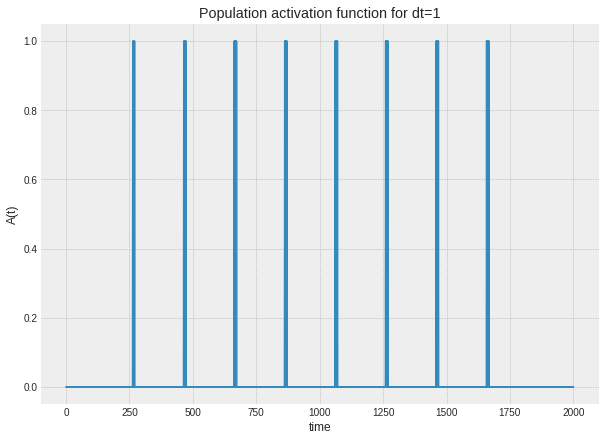

In [0]:
plot_window(1,V)

When our time window w grows, we are able to include more peaks across our sweep through the entire time-series.

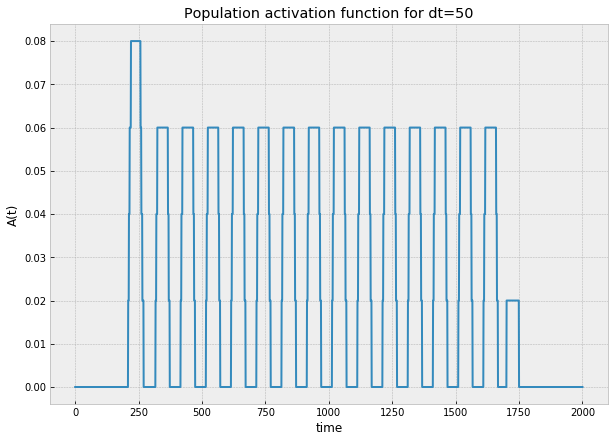

In [0]:
dt = 0.5
plot_window(50,V)

## w=25
## No noise
## $I_{ext} = 5(mA)$ 

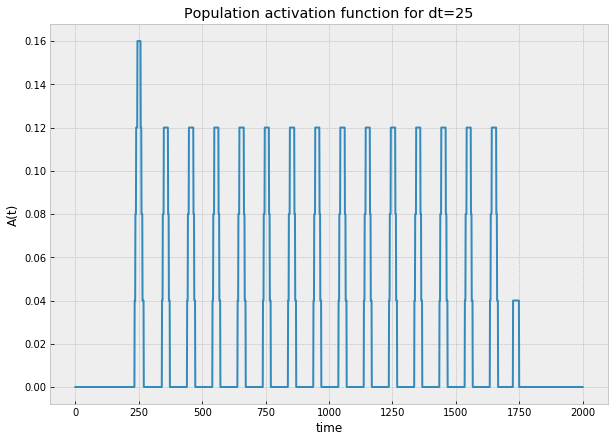

In [0]:
plot_window(25,V)

## w=25
## No noise
## $I_{ext} = 10(mA)$ 

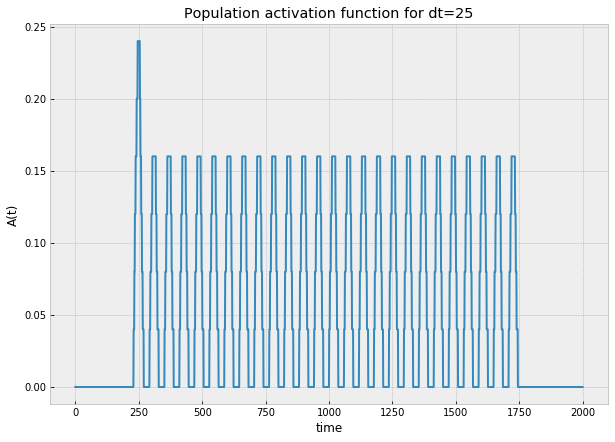

In [0]:
plot_window(25,V1)

## w=25
## No noise
## $I_{ext}$: sinusoidal

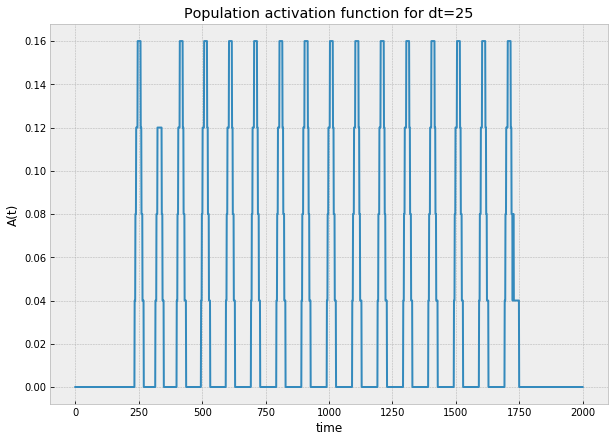

In [0]:
plot_window(25,Vsin)

# Noise Models
We will choose a low value of w to get a grainy detail of the individual neuron spikes happening every millisecond.



## w=1

## Step Function

## $I_{ext} = 5(mA)$ 

We can see that our model displays a constant frequency spikes for when the external current is turned off. This is the result of having the ability to excite the neurons that are at a verge of spiking prior to the external current being turned on. What is interesting is our population activity displaying oscillatory behaviour when a constant noisy current was provided.

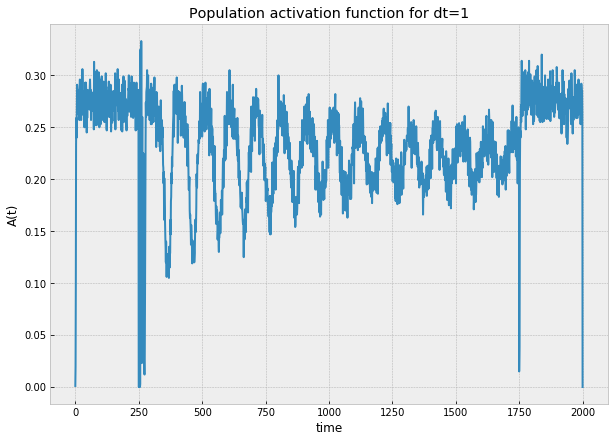

In [0]:
plot_window(1,Vn)

As we can see things get smoother by choosing $w=15$.

However, our frequency values significantly increase since the total number of spikes we are including in our window also increases.

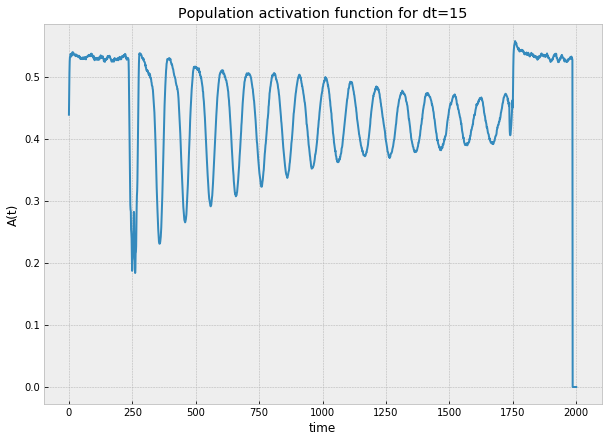

In [0]:
plot_window(15,Vn)

## w=1

## Step Function

## $I_{ext} = 10(mA)$ 

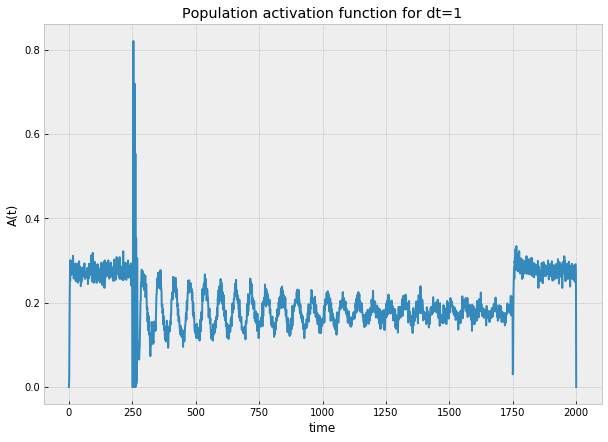

In [0]:
plot_window(1,Vn1)

## w=1

## Sinusoidal Function

## $I_{ext} = 5(mA)$ 



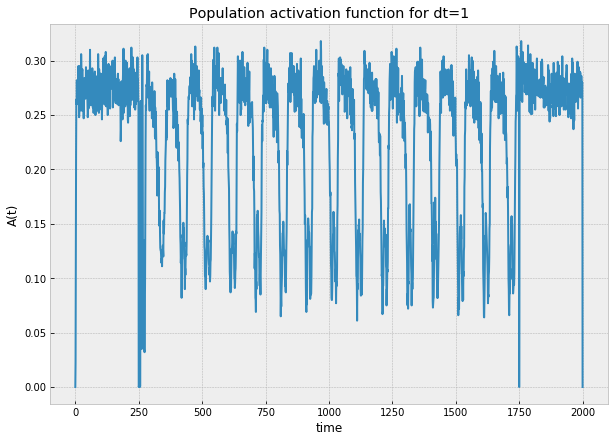

In [0]:
plot_window(1,Vnsin)

## w=15

## Sinusoidal Function

## $I_{ext} = 5(mA)$ 



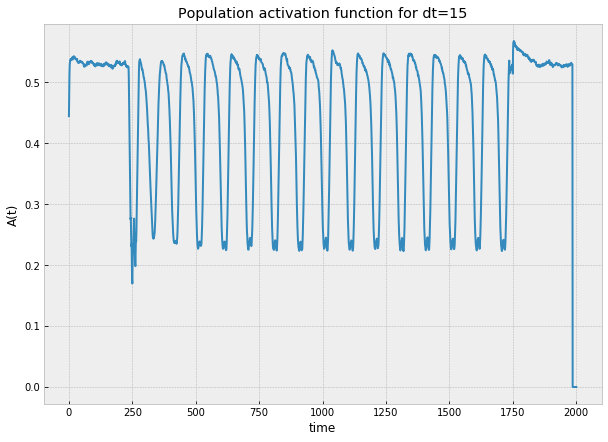

In [0]:
plot_window(15,Vnsin)

The model created by Eugene M. Izhikevich, as mentioned in “Simple Model of Spiking Neurons”, biologically reasonable as the Hodgkin-Huxley model and efficient as the integrate-and-fire neuron. It represents the behavior of neurons by producing the bursting, spiking, and mixed mode firing patterns. The model is a two-dimensional model, which can exhibit the behavior of different types of Neurons like Thalamo-Cortical neuron and Resonator neuron. By using Bifurcation methodologies, the Hodgkin-Huxley types neuronal model has been reduced to a two-dimensional model which can be altered to exhibit the behaviour of different types of neurons by varying the values of the four parameters a, b, c, d. 

# References

Gerstner, W., Kistler, W. M., Naud, R., & Paninski, L. (2014). Neuronal dynamics: From single neurons to networks and models of cognition. Cambridge University Press. Retrieved from https://neuronaldynamics.epfl.ch/online/Ch12.html

Gunasekaran, H., Spigler, G., Mazzoni, A., Cataldo, E., & Oddo, C.M. (2019). Convergence of regular spiking and intrinsically bursting Izhikevich neuron models as a function of discretization time with Euler method. Neurocomputing, 350, 237-247. 

Hodgkin, A.L., & Huxley, A.F. (1952). A quantitative description of membrane current and its application to conduction and excitation in nerve. The Journal of Physiology, 117(4), 500-544. doi: 10.1113/jphysiol.1952.sp004764

Izhikevich, E. M. (2003). Simple model of spiking neuron. IEEE Transactions on Neural Networks, 14(6), 1569-1572. 

Ludwig, P.E., & Varacallo, M. (2018). Neuroanatomy, Neurons. StatPearls Publishing, Treasure Island, 2018. 

OpenStax College (2013). Anatomy & physiology. Houston, TX: OpenStax CNX. Retrieved from http://cnx.org/content/col11496/latest/

Santamaria, F., Bower, J.M. (2009). Hodgkin-Huxley models. Encyclopedia of Neuroscience, 1173-1180. doi: 10.1016/B978-008045046-9.01413-3

Schwiening, C.J. (2012). A brief historical perspective: Hodgkin and Huxley. The Journal of Physiology, 590(11), 2571-2575

Solomowitz, E., Styr, B., Vertkin, I., Milshtein-Parush, H., Israel, N., Slutsky, M., & Slutsky, I. (2015). Interplay between population firing stability and single neuron dynamics in hippocampal networks. eLife, 4, e04378. doi:10.7554/eLife.04378

Trappenberg, T.P. (2010). Fundamentals of Computational Neuroscience, 2nd edition, Oxford University Press, ISBN14: 9780199568413, ISBN10: 0199568413

Vázquez, R.A. (2010). Izhikevich neuron model and its application in pattern recognition. Australian Journal of Intelligent Information Processing Systems, 11(1), 35-40. 


# Fourier Spectrums (because why not):

The continuous Fourier transform is defined by \\
$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-2\pi i \omega t} dt$, \\
which is useful in transforming a mathematical function of time, $f(t)$ into a function of frequency, $F(\omega)$.\
The new function is referred to as the Fourier spectrum of the function $f$.

The continuous Fourier transform is useful for transforming infinetely long time-domain signals into a continuous spectrum of an infinite number of sinusoidal curves. \\

In many cases, the data we are working with deals with discretely sampled signals at constant intervals, rather than continuous smooth signals. For such discrete data, we apply the Discrete Fourier Transform.

# Convert V time series to its Fourier Spectrum:

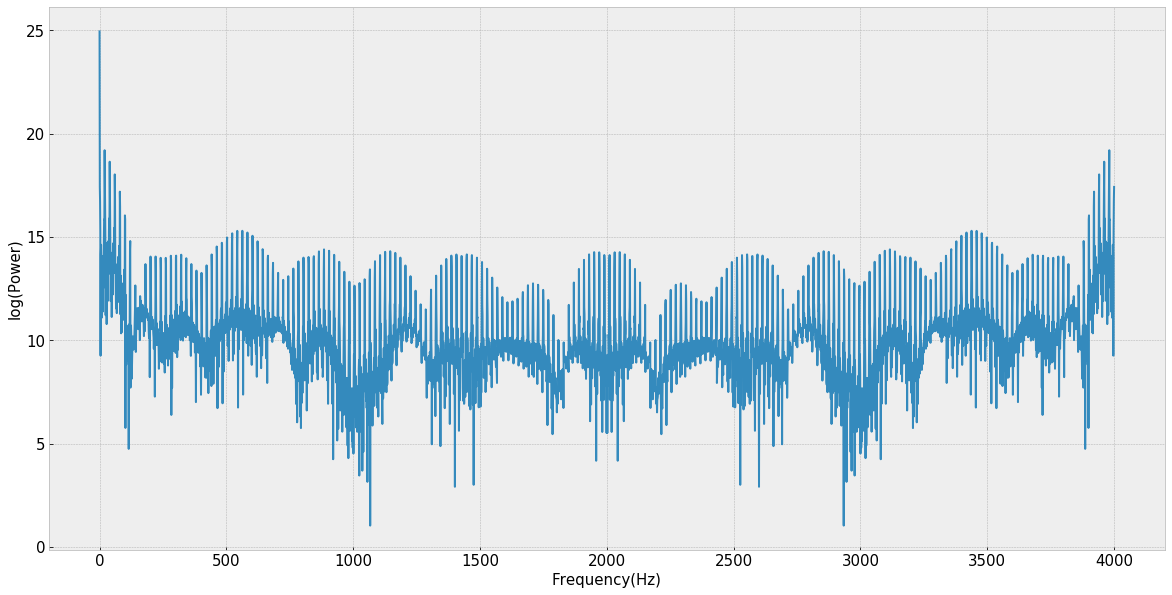

In [0]:
from scipy.fftpack import fft #package that contains the discrete fast fourier transform
fig, ax1 = plt.subplots(figsize=(20,10))

#fig = plt.figure()
f = np.arange(0,2*time.max()+1)

#power spectrum 
power = np.abs(fft(V[0])**2)
power = np.log(power)
plt.plot(f,power)
plt.xlabel('Frequency(Hz)', fontsize =15)
plt.ylabel('log(Power)', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


## Fourier Spectrum for U: 

(please play with the xlim bounds)


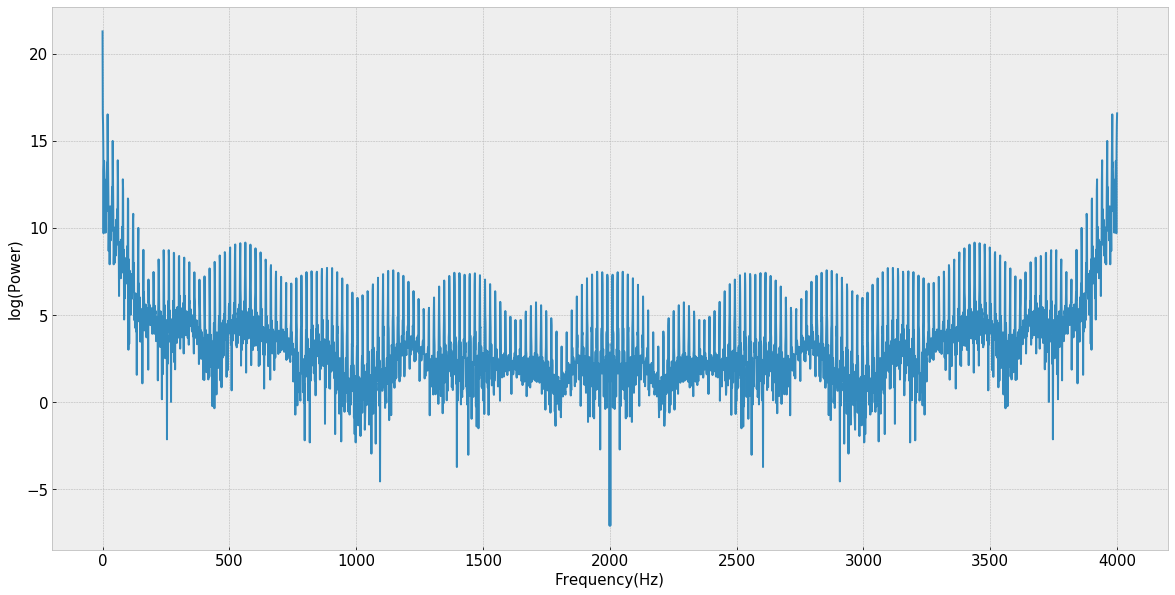

In [106]:
from scipy.fftpack import fft #package that contains the discrete fast fourier transform
fig, ax1 = plt.subplots(figsize=(20,10))
f = np.arange(0,2*time.max()+1)

#power spectrum 
power = np.abs(fft(U[0])**2)
power = np.log(power)
plt.plot(f,power)
#plt.xlim(1500,2000)
#plt.xlim(2000,3000)
plt.xlabel('Frequency(Hz)', fontsize =15)
plt.ylabel('log(Power)', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


## Fourier Transform of the noisy sinusoidal signal:

## For V

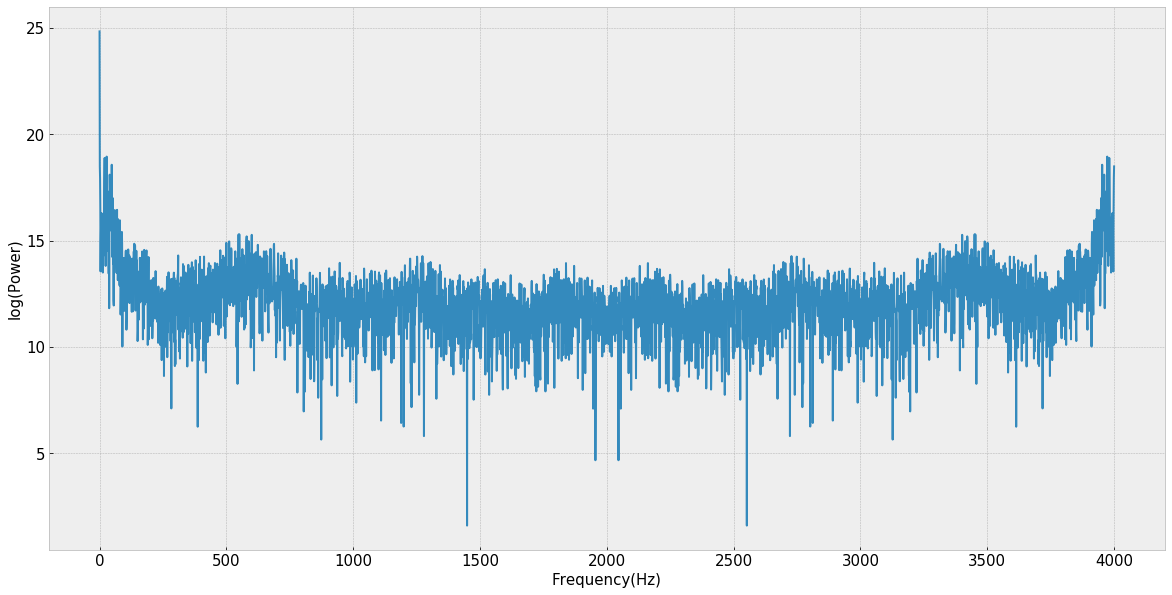

In [98]:
from scipy.fftpack import fft #package that contains the discrete fast fourier transform
fig, ax1 = plt.subplots(figsize=(20,10))
#fig = plt.figure()
f = np.arange(0,2*time.max()+1)

#power spectrum 
power = np.abs(fft(V1nsin[0])**2)
power = np.log(power)
plt.plot(f,power)
#plt.xlim(1000,1300)
plt.xlabel('Frequency(Hz)', fontsize =15)
plt.ylabel('log(Power)', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


## For U:

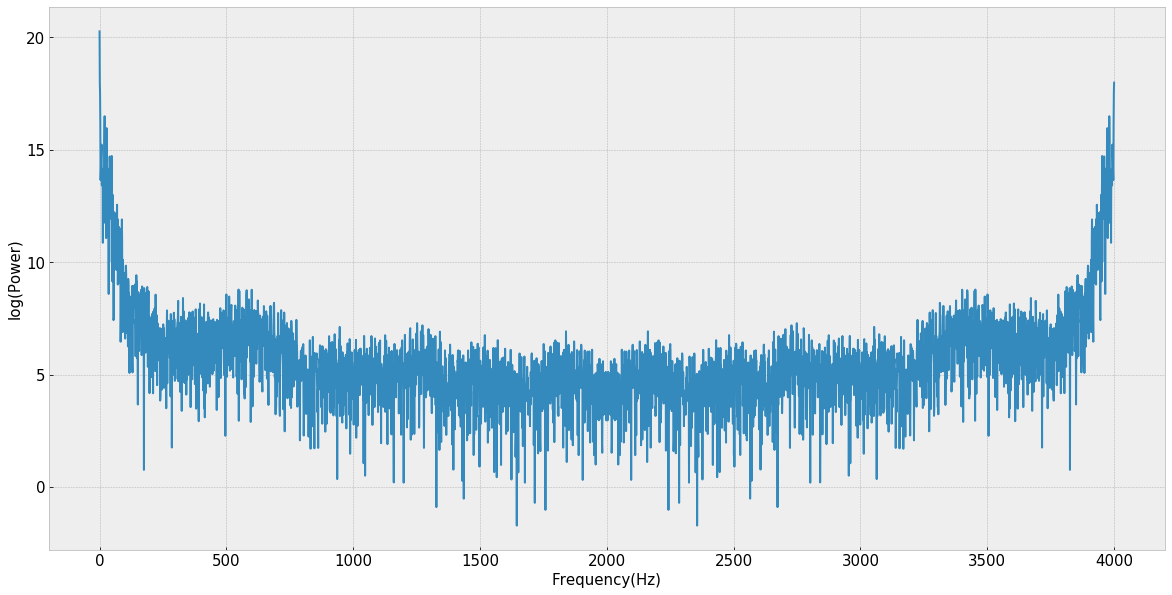

In [93]:
from scipy.fftpack import fft #package that contains the discrete fast fourier transform
fig, ax1 = plt.subplots(figsize=(20,10))
#fig = plt.figure()
f = np.arange(0,2*time.max()+1)

#power spectrum 
power = np.abs(fft(U1nsin[0])**2)
power = np.log(power)
plt.plot(f,power)

plt.xlabel('Frequency(Hz)', fontsize =15)
plt.ylabel('log(Power)', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


I actually did a small write up for a fourier analysis on a dynamical equation just last year, if you're interested [here](https://colab.research.google.com/drive/1BLtc5kb2YyrchT1yIMJQOPv5-veqrGy4) it is:
